In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,export_graphviz
import graphviz
import dtreeviz
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import tree
from pypinyin import pinyin, lazy_pinyin, Style
from autogluon.tabular import TabularDataset, TabularPredictor

In [18]:
def word_to_py(word):
    temp = pinyin(word,style=Style.FIRST_LETTER)
    result = ""
    for one_word in [_[0] for _ in temp]:
        result+=str(one_word).upper()
    return result

In [19]:
# autogluon保存路径
model_path = r"F:\cache_data\model_path\dy\soil_type\autogluon\filter_features_tz_20240428_simple_nolonlatdldz"
# 检查路径是否存在，否则便创建
if not os.path.exists(model_path):
    os.makedirs(model_path)
else:
    print("文件夹已存在")

文件夹已存在


In [20]:
dataset = pd.read_csv(r"F:\cache_data\frequency_filter\dy\scaler_csv\dy_frequency_filter_2024_424.csv")

In [21]:
dataset.columns

Index(['TL', 'YL', 'TS', 'TZ', 'DEM', 'AnalyticalHillshading', 'Aspect',
       'ChannelNetworkBaseLevel', 'ChannelNetworkDistance',
       'ClosedDepressions', 'ConvergenceIndex', 'LSFactor', 'PlanCurvature',
       'ProfileCurvature', 'RelativeSlopePosition', 'Slope',
       'TopographicWetnessIndex', 'TotalCatchmentArea', 'ValleyDepth',
       'Contrast', 'Correlation', 'Dissimilarity', 'Entropy', 'Homogeneity',
       'Mean', 'ndvi', 'PCA_0', 'PCA_1', 'SecondMoment', 'Variance', 'PRE',
       'SRA', 'TMP', 'VAP', 'WIND', 'BIO', 'LON', 'LAT', 'PH', 'DZ', 'DL',
       'MRRTF', 'MRVBF'],
      dtype='object')

In [22]:

print(dataset.size)
dataset.dropna(inplace=True)
print(dataset.size)
dataset.columns


258258
258258


Index(['TL', 'YL', 'TS', 'TZ', 'DEM', 'AnalyticalHillshading', 'Aspect',
       'ChannelNetworkBaseLevel', 'ChannelNetworkDistance',
       'ClosedDepressions', 'ConvergenceIndex', 'LSFactor', 'PlanCurvature',
       'ProfileCurvature', 'RelativeSlopePosition', 'Slope',
       'TopographicWetnessIndex', 'TotalCatchmentArea', 'ValleyDepth',
       'Contrast', 'Correlation', 'Dissimilarity', 'Entropy', 'Homogeneity',
       'Mean', 'ndvi', 'PCA_0', 'PCA_1', 'SecondMoment', 'Variance', 'PRE',
       'SRA', 'TMP', 'VAP', 'WIND', 'BIO', 'LON', 'LAT', 'PH', 'DZ', 'DL',
       'MRRTF', 'MRVBF'],
      dtype='object')

In [23]:
dataset.columns

Index(['TL', 'YL', 'TS', 'TZ', 'DEM', 'AnalyticalHillshading', 'Aspect',
       'ChannelNetworkBaseLevel', 'ChannelNetworkDistance',
       'ClosedDepressions', 'ConvergenceIndex', 'LSFactor', 'PlanCurvature',
       'ProfileCurvature', 'RelativeSlopePosition', 'Slope',
       'TopographicWetnessIndex', 'TotalCatchmentArea', 'ValleyDepth',
       'Contrast', 'Correlation', 'Dissimilarity', 'Entropy', 'Homogeneity',
       'Mean', 'ndvi', 'PCA_0', 'PCA_1', 'SecondMoment', 'Variance', 'PRE',
       'SRA', 'TMP', 'VAP', 'WIND', 'BIO', 'LON', 'LAT', 'PH', 'DZ', 'DL',
       'MRRTF', 'MRVBF'],
      dtype='object')

In [24]:
# dataset["SC_label"] = dataset.SC.astype("category").cat.codes
# dataset["DL_label"] = dataset.DL.astype("category").cat.codes
# dataset["DZ_label"] = dataset.DZ.astype("category").cat.codes
dataset["TZ_label"] = dataset.TZ.astype("category").cat.codes

In [25]:
dataset['DL'] = dataset['DL'].astype('category')
dataset['DZ'] = dataset['DZ'].astype('category')
dataset['TZ_label'] = dataset['TZ_label'].astype('category')

In [26]:
result = dataset.groupby('TZ_label', observed=True)["TZ"].apply(lambda x: list(x.unique())).to_dict()
print(result)

{0: ['中层壤质中性紫色土'], 1: ['中层灰泥质黄色石灰土'], 2: ['中层砾壤质黑色石灰土'], 3: ['中层红泥质黄壤'], 4: ['厚层壤质黄色石灰土'], 5: ['厚层泥质黄壤'], 6: ['厚层红泥质黄壤'], 7: ['浅石灰泥田'], 8: ['潮泥田'], 9: ['潮砂泥田'], 10: ['石灰泥田'], 11: ['腐中层壤质酸性紫色土'], 12: ['腐中层壤质钙质紫色土'], 13: ['腐中层壤质黄色石灰土'], 14: ['腐中层泥质黄壤'], 15: ['腐中层灰泥质黄壤'], 16: ['腐中层砂泥质黄壤'], 17: ['腐中层砂泥质黄壤性土'], 18: ['腐中层硅质黄壤'], 19: ['腐厚层壤质黄色石灰土'], 20: ['腐厚层泥质黄壤'], 21: ['腐厚层灰泥质黄壤'], 22: ['腐厚层砂泥质黄壤'], 23: ['腐厚层硅质黄壤'], 24: ['腐薄层壤质黄色石灰土'], 25: ['腐薄层壤质黑色石灰土'], 26: ['腐薄层暗泥质黄壤'], 27: ['腐薄层泥质黄壤'], 28: ['腐薄层灰泥质黄壤'], 29: ['腐薄层砂泥质黄壤'], 30: ['腐薄层砾硅质黄壤'], 31: ['腐薄层硅质山地灌丛草甸土'], 32: ['腐薄层硅质黄壤'], 33: ['腐薄层黏质黄色石灰土'], 34: ['薄层壤质中性紫色土'], 35: ['薄层灰泥质黄色石灰土'], 36: ['薄层砾壤质中性紫色土'], 37: ['薄层砾壤质黑色石灰土'], 38: ['薄层砾硅质黄壤'], 39: ['薄层硅质黄壤'], 40: ['薄层红泥质黄壤'], 41: ['轻漂砂泥田'], 42: ['重漂砂泥田'], 43: ['重漂红泥田'], 44: ['青石灰泥田'], 45: ['黄浅白粉泥田'], 46: ['黄浅砂泥田'], 47: ['黄浅红泥田'], 48: ['黄浅鳝泥田'], 49: ['黄白粉泥田'], 50: ['黄砂泥田'], 51: ['黄红泥田'], 52: ['黄青白粉泥田'], 53: ['黄青砂泥田'], 54: ['黄黄砂泥田']}


In [27]:
# features = ['DEM', 'Mean', 'ndvi', 'PCA_0', 'LON', 'LAT', 'PH','DL','DZ']
# features = list(dataset.columns[1:-1])
features = ['DEM', 'Slope','TopographicWetnessIndex','Mean', 'ndvi', 'PCA_0','MRVBF','LON', 'LAT']
target = "TZ_label"

In [28]:
type(features)

list

In [29]:
data = dataset[features+[target]]

In [30]:
data.sample(1)

,DEM,Slope,TopographicWetnessIndex,Mean,ndvi,PCA_0,MRVBF,LON,LAT,TZ_label
4324,1078.2,0.094066,6.171133,10.777778,0.252469,0.099011,1.082834,428245.0,2885000.0,41


In [31]:
# 分割训练集和测试集
# data_train,data_test = train_test_split(data, test_size=0.2, random_state=42)
data = data
label = "TZ_label"

In [32]:
predictor = TabularPredictor(label=label,path=model_path,eval_metric="f1_weighted",problem_type='multiclass').fit(data)

No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "F:\cache_data\model_path\dy\soil_type\autogluon\filter_features_tz_20240428_simple_nolonlatdldz"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          20
Memory Avail:       41.65 GB / 63.81 G

In [16]:
# 获取最佳模型
best_model = predictor.model_best
best_model
# 获取WeightedEnsemble_L3模型
# 获取模型的训练摘要
model_summary = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2   0.761613  f1_weighted       0.308234  577.988677                0.002000           1.805809            2       True         14
1               XGBoost   0.704258  f1_weighted       0.005301    5.944401                0.005301           5.944401            1       True         11
2              CatBoost   0.702985  f1_weighted       0.011674  501.860856                0.011674         501.860856            1       True          8
3              LightGBM   0.692275  f1_weighted       0.000532    4.816494                0.000532           4.816494            1       True          5
4      RandomForestEntr   0.685163  f1_weighted       0.051253    1.180996                0.051253           1.180996            1       True          7
5      RandomForestG

In [22]:
# 测试数据集
y_test_pred = predictor.predict(data_test.drop(columns=[label]))
y_test = data_test[label]
# 训练数据
y_train_pred = predictor.predict(data_train.drop(columns=[label]))
y_train = data_train[label]


In [23]:
predictor.leaderboard(data_train, silent=True)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.929894,0.599293,f1_weighted,4.731062,0.474653,495.661332,0.000000,0.000000,1.272600,2,True,9
1,LightGBM,0.929066,0.592665,f1_weighted,1.266803,0.115728,13.516278,1.266803,0.115728,13.516278,1,True,5
2,RandomForestEntr,0.926045,0.552934,f1_weighted,0.400029,0.051787,1.863762,0.400029,0.051787,1.863762,1,True,7
3,RandomForestGini,0.925432,0.539876,f1_weighted,0.383067,0.051155,1.462645,0.383067,0.051155,1.462645,1,True,6
4,LightGBMXT,0.925270,0.553879,f1_weighted,2.550171,0.233464,21.866381,2.550171,0.233464,21.866381,1,True,4
5,NeuralNetFastAI,0.898021,0.495975,f1_weighted,0.040690,0.000000,3.556072,0.040690,0.000000,3.556072,1,True,3
6,CatBoost,0.814018,0.507772,f1_weighted,0.066428,0.019870,449.418489,0.066428,0.019870,449.418489,1,True,8
7,KNeighborsDist,0.735604,0.524298,f1_weighted,0.012595,0.002650,0.006198,0.012595,0.002650,0.006198,1,True,2
8,KNeighborsUnif,0.618592,0.519359,f1_weighted,0.011278,0.000000,2.698906,0.011278,0.000000,2.698906,1,True,1


In [24]:
predictor.leaderboard(data_test,silent=True)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.565186,0.599293,f1_weighted,2.113364,0.474653,495.661332,0.000000,0.000000,1.272600,2,True,9
1,LightGBM,0.563198,0.592665,f1_weighted,0.483663,0.115728,13.516278,0.483663,0.115728,13.516278,1,True,5
2,RandomForestEntr,0.545586,0.552934,f1_weighted,0.316692,0.051787,1.863762,0.316692,0.051787,1.863762,1,True,7
3,RandomForestGini,0.541376,0.539876,f1_weighted,0.349289,0.051155,1.462645,0.349289,0.051155,1.462645,1,True,6
4,LightGBMXT,0.513651,0.553879,f1_weighted,0.914762,0.233464,21.866381,0.914762,0.233464,21.866381,1,True,4
5,KNeighborsUnif,0.507929,0.519359,f1_weighted,0.000000,0.000000,2.698906,0.000000,0.000000,2.698906,1,True,1
6,KNeighborsDist,0.501922,0.524298,f1_weighted,0.009279,0.002650,0.006198,0.009279,0.002650,0.006198,1,True,2
7,CatBoost,0.488256,0.507772,f1_weighted,0.033651,0.019870,449.418489,0.033651,0.019870,449.418489,1,True,8
8,NeuralNetFastAI,0.465603,0.495975,f1_weighted,0.006027,0.000000,3.556072,0.006027,0.000000,3.556072,1,True,3


In [25]:

# 训练集指标
train_metrics = predictor.leaderboard(data_train, silent=True) 

# 测试集指标
test_metrics = predictor.leaderboard(data_test, silent=True)

pd_train = train_metrics[['model','score_test']]
pd_test = test_metrics[['model','score_test']]
pd_result = pd.merge(pd_train,pd_test,on='model')
pd_result.rename(columns = {"model":"Model","score_test_x":"Train Set","score_test_y":"Test  Set"},inplace=True)

In [26]:
pd_result

,Model,Train Set,Test Set
0,WeightedEnsemble_L2,0.929894,0.565186
1,LightGBM,0.929066,0.563198
2,RandomForestEntr,0.926045,0.545586
3,RandomForestGini,0.925432,0.541376
4,LightGBMXT,0.925270,0.513651
5,NeuralNetFastAI,0.898021,0.465603
6,CatBoost,0.814018,0.488256
7,KNeighborsDist,0.735604,0.501922
8,KNeighborsUnif,0.618592,0.507929


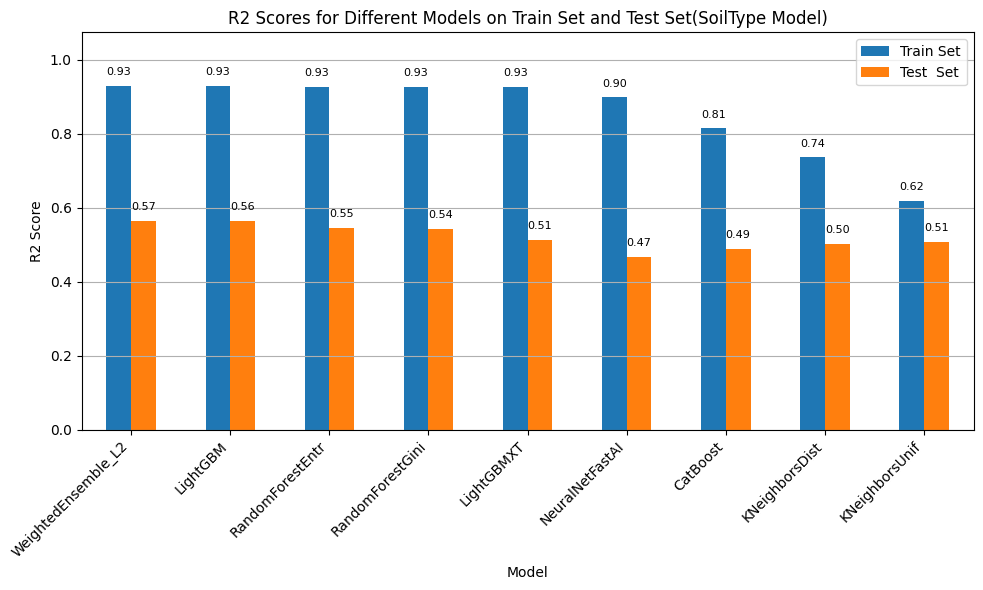

In [27]:
ax = pd_result.set_index('Model').plot(kind='bar', figsize=(10,6))
ymin, ymax = ax.get_ylim()

# 调整 y 轴上限为原上限的 1.2 倍，留出20%的空间。你可以根据需要调整这个倍数。
ax.set_ylim(ymin, ymax * 1.1)
plt.title('R2 Scores for Different Models on Train Set and Test Set(SoilType Model)')
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')

# 添加数值标签
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',fontsize=8, 
                )

plt.tight_layout()
plt.show()


In [14]:
predictor = TabularPredictor.load(r"F:\cache_data\model_path\dy\soil_type\autogluon\filter_features_tz_20240424_no_climate")
# 获取特征重要性
feature_importance = predictor.feature_importance(data=data)
print(feature_importance)

# # 基于特征重要性来选择特征
# important_features = feature_importance[feature_importance['importance'] > 0].index.tolist()

# # 使用重要的特征重新训练模型
# predictor = TabularPredictor(label='目标列名').fit(train_data[important_features + ['目标列名']])


Computing feature importance via permutation shuffling for 32 features using 5000 rows with 5 shuffle sets...


	816.51s	= Expected runtime (163.3s per shuffle set)
	372.3s	= Actual runtime (Completed 5 of 5 shuffle sets)


                         importance    stddev       p_value  n  p99_high  \
LON                        0.365821  0.005241  5.055698e-09  5  0.376614   
LAT                        0.302469  0.003176  1.458948e-09  5  0.309009   
DL                         0.281406  0.004499  7.834271e-09  5  0.290669   
DZ                         0.023128  0.002185  9.453294e-06  5  0.027628   
PH                         0.023015  0.002211  1.009413e-05  5  0.027567   
ChannelNetworkBaseLevel    0.011003  0.000836  3.970286e-06  5  0.012725   
DEM                        0.007800  0.001571  1.873754e-04  5  0.011035   
ValleyDepth                0.007389  0.001008  4.055206e-05  5  0.009464   
ChannelNetworkDistance     0.005408  0.000788  5.267522e-05  5  0.007031   
MRVBF                      0.005119  0.001151  2.874589e-04  5  0.007490   
Correlation                0.004927  0.000575  2.180424e-05  5  0.006111   
ProfileCurvature           0.004836  0.000231  6.216629e-07  5  0.005312   
PCA_1       

In [15]:
feature_df = pd.DataFrame(feature_importance)

In [16]:
feature_df

,importance,stddev,p_value,n,p99_high,p99_low
LON,0.503957,0.007511,5.920355e-09,5,0.519423,0.488492
LAT,0.404107,0.006892,1.014713e-08,5,0.418297,0.389917
SRA,0.021098,0.003511,8.870051e-05,5,0.028327,0.013870
PH,0.013059,0.001424,1.668843e-05,5,0.015990,0.010127
TotalCatchmentArea,0.012854,0.001503,2.201295e-05,5,0.015948,0.009760
BIO,0.008803,0.001708,1.619223e-04,5,0.012320,0.005286
DEM,0.008687,0.001781,2.007005e-04,5,0.012355,0.005020
ChannelNetworkDistance,0.008018,0.000773,1.023848e-05,5,0.009610,0.006426
DL,0.007840,0.001085,4.289464e-05,5,0.010074,0.005606
Slope,0.007408,0.000936,2.989017e-05,5,0.009335,0.005482


In [70]:
# 加载模型
with open(os.path.join(model_path,predictor), 'rb') as f:
    predictor = pickle.load(f)

In [71]:
# 查看准确率
y_test_pred= predictor.predict(data_test)
y_train_pred = predictor.predict(Xtrain)
accuracy_test = accuracy_score(ytest,y_test_pred)
accuracy_train = accuracy_score(ytrain,y_train_pred)
print(accuracy_train,accuracy_test)

0.9571192963166575 0.9142857142857143


In [9]:
# 导入autogluon模型
predictor = TabularPredictor.load(r"F:\cache_data\model_path\dy\soil_type\autogluon")

In [22]:
# 获取特征
feature_names = predictor.feature_metadata_in.get_features()
print(feature_names)


['DEM', 'Aspect', 'ChannelNetworkBaseLevel', 'PlanCurvature', 'ProfileCurvature', 'RelativeSlopePosition', 'Slope', 'TopographicWetnessIndex', 'TotalCatchmentArea', 'Mean', 'ndvi', 'PCA_0', 'PRE', 'SRA', 'TMP', 'VAP', 'WIND', 'BIO', 'LON', 'LAT', 'PH', 'DL', 'DZ']


In [23]:
fetures_value = predictor.feature_importance(data_train)


Computing feature importance via permutation shuffling for 23 features using 2880 rows with 5 shuffle sets...
	108.02s	= Expected runtime (21.6s per shuffle set)
	56.54s	= Actual runtime (Completed 5 of 5 shuffle sets)


In [24]:
# 将索引添加为列
df = fetures_value
df.reset_index(level=0, inplace=True)

In [25]:
fetures_value

,index,importance,stddev,p_value,n,p99_high,p99_low
0,LON,0.332708,0.003815,2.073457e-09,5,0.340563,0.324854
1,LAT,0.202014,0.007501,2.277005e-07,5,0.217459,0.186569
2,SRA,0.012431,0.002132,9.988211e-05,5,0.016820,0.008041
3,DEM,0.005417,0.001380,4.648438e-04,5,0.008258,0.002575
4,DZ,0.005000,0.000677,3.933333e-05,5,0.006394,0.003606
5,VAP,0.004653,0.000720,6.667418e-05,5,0.006135,0.003170
6,BIO,0.004583,0.001354,8.159692e-04,5,0.007371,0.001796
7,ChannelNetworkBaseLevel,0.004375,0.001242,7.027765e-04,5,0.006933,0.001817
8,PH,0.004167,0.001177,6.901871e-04,5,0.006591,0.001742
9,TMP,0.004167,0.000347,5.733841e-06,5,0.004882,0.003452


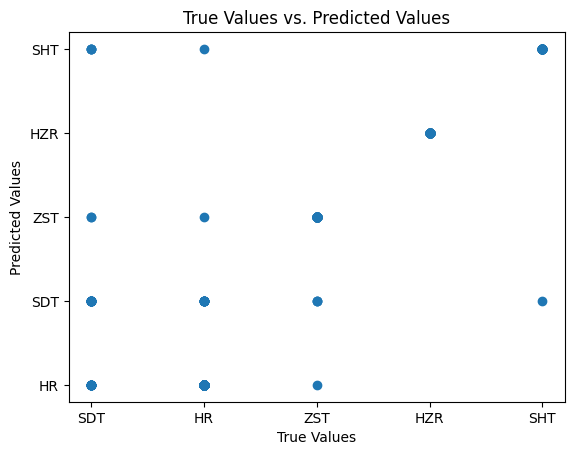

In [72]:
# 预测散点图
plt.scatter(ytest.values, y_test_pred)

# 添加标签和标题
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')

# 显示图表
plt.show()

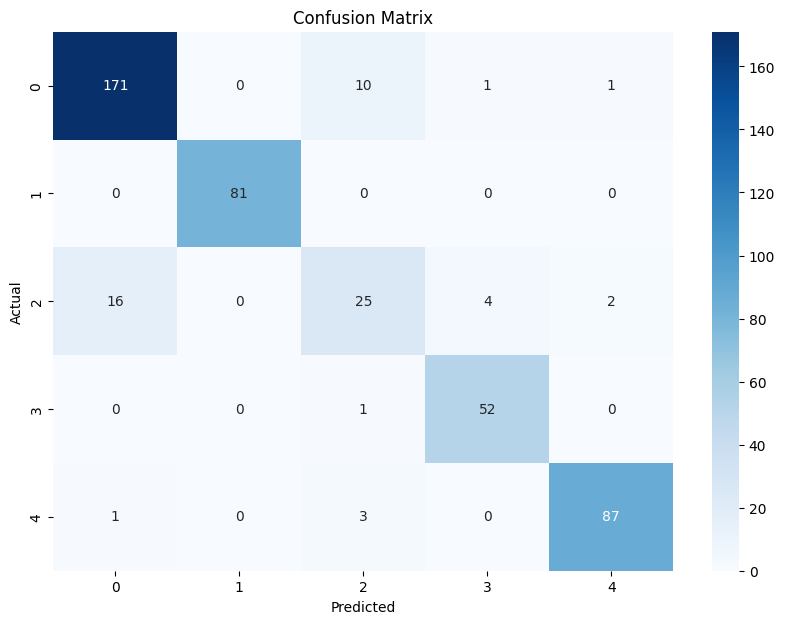

In [74]:
# 绘制混淆矩阵
cm = confusion_matrix(ytest, y_test_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

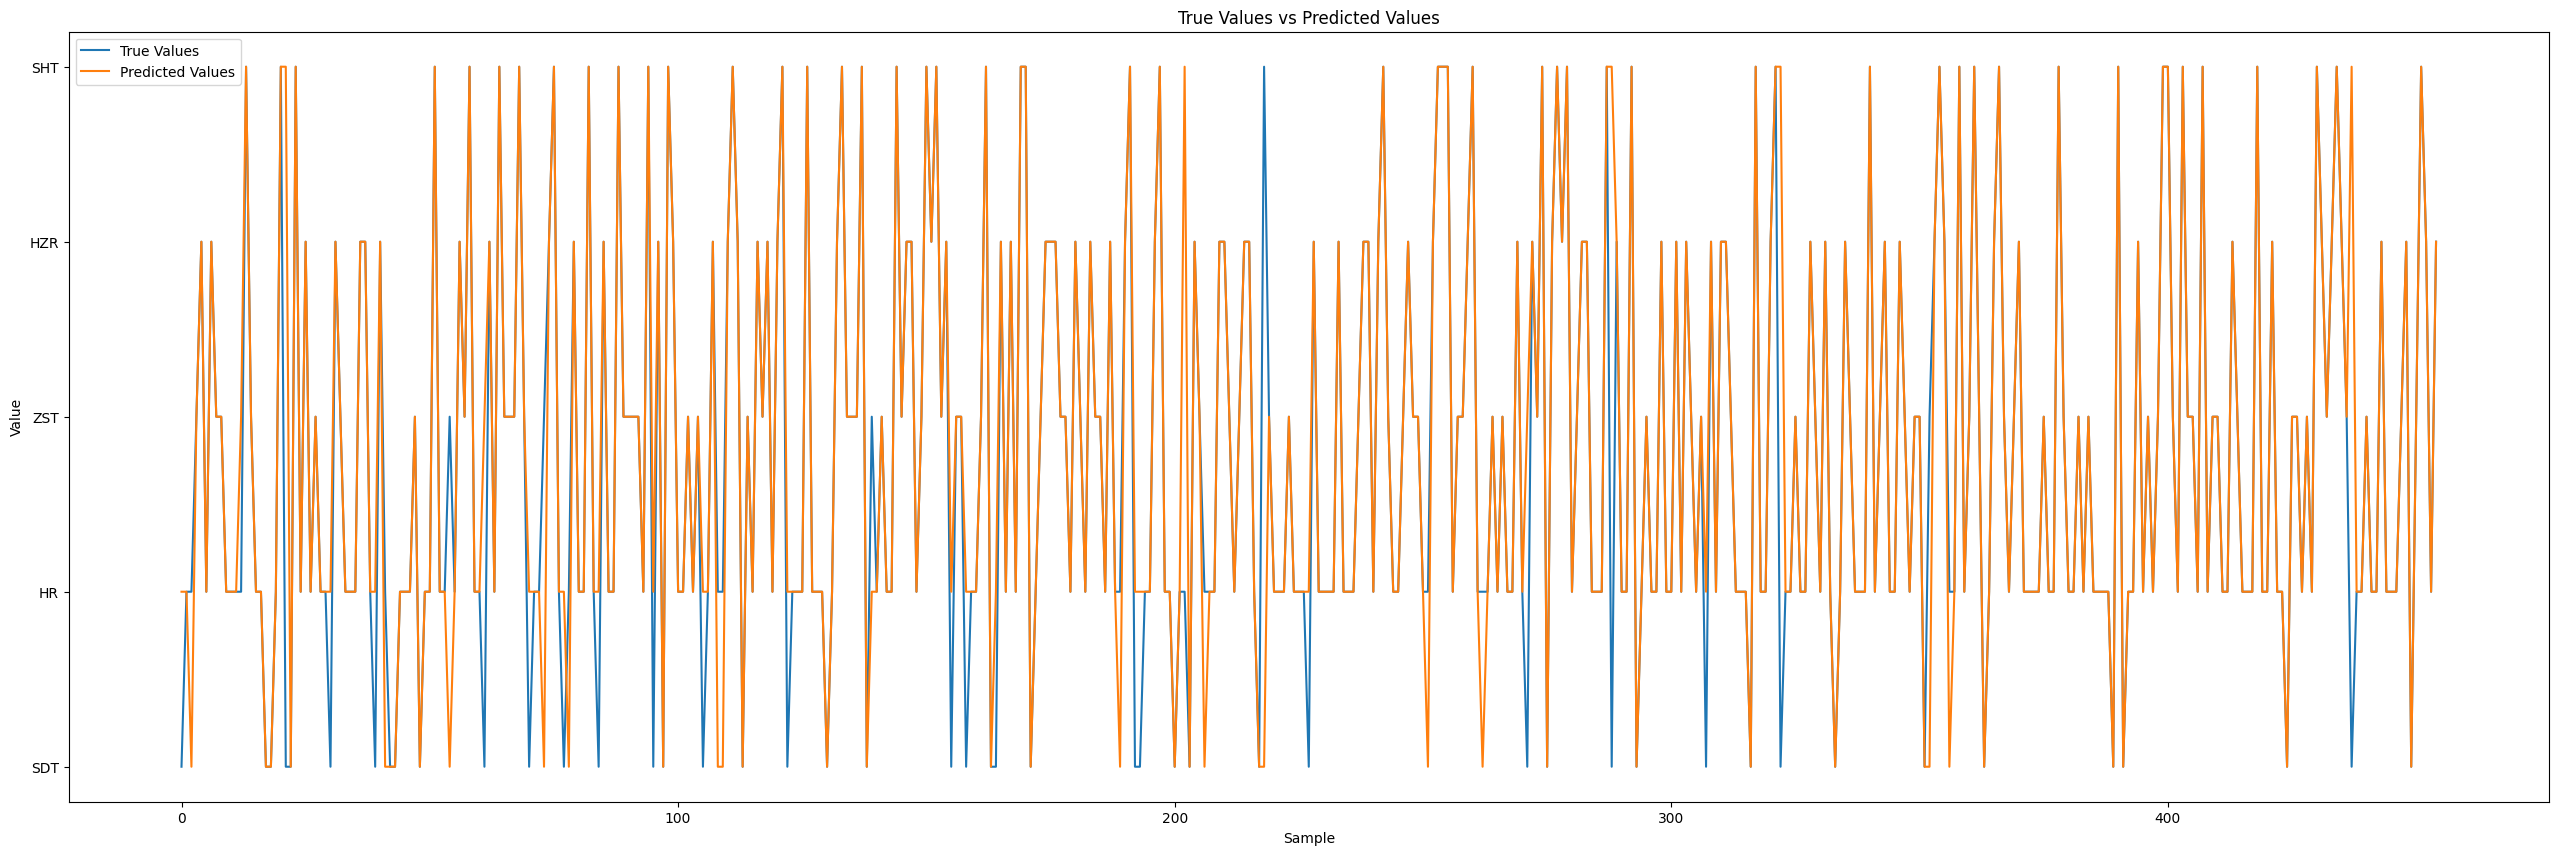

In [75]:
# 创建折线图
plt.figure(figsize=(32,10))
plt.plot(ytest.values, label='True Values')
plt.plot(y_test_pred, label='Predicted Values')

# 图表标题和标签
plt.title('True Values vs Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Value')

# 添加图例
plt.legend()

# 显示图表
plt.show()

In [14]:
# 剪枝

In [79]:
viz_model = dtreeviz.model(predictor,
                           X_train=Xtrain, y_train=ytrain,
                           feature_names=features,
                           target_name=target, class_names=["SDT", "SHT","ZST","HR","HZR"])

In [ ]:
viz_model.view()

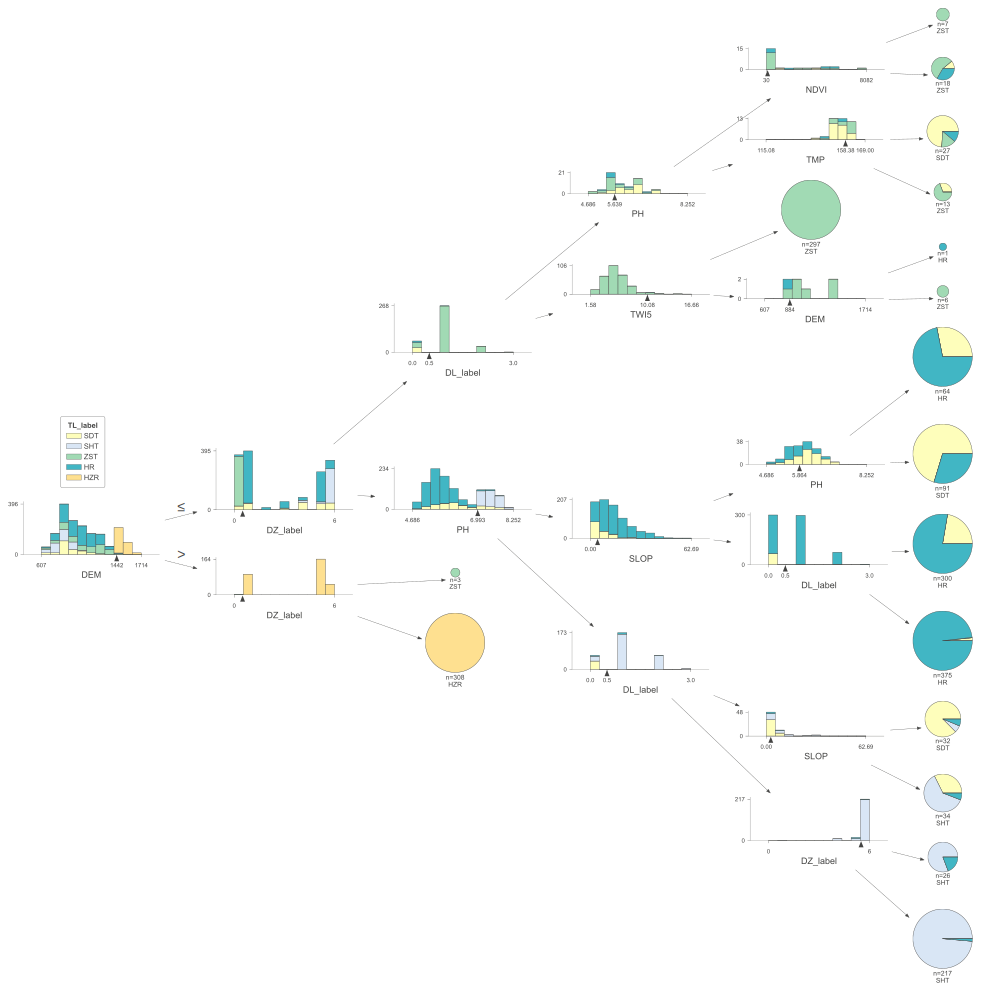

In [19]:
viz_model.view(orientation="LR")

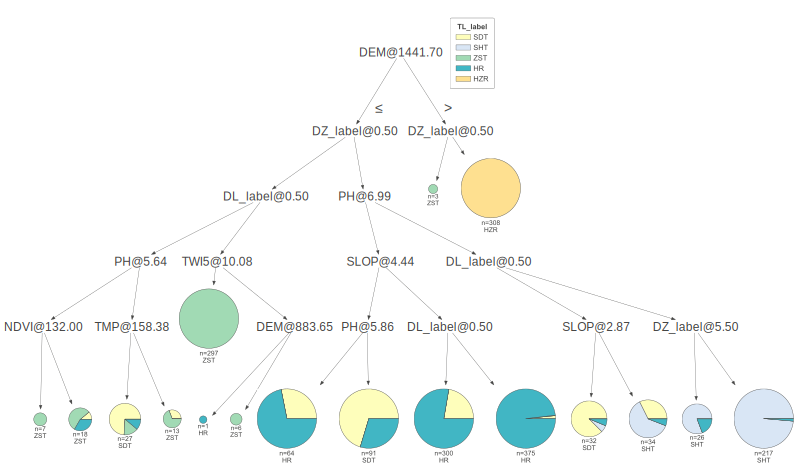

In [20]:
viz_model.view(fancy=False)